In [1]:
# Data Loading & Pre - Processing (Week 1)

In [2]:
#setting up environment

import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.datasets as dt
import numpy as np

In [3]:
torchvision.datasets.MNIST

torchvision.datasets.mnist.MNIST

In [4]:
torch.utils.data.DataLoader

torch.utils.data.dataloader.DataLoader

In [5]:
#converting the images in the dataset to a tensor and normalizing it

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
mnist_dataset_train = dt.MNIST(root= './data', download = True, train = True, transform = transform)

In [7]:
mnist_dataset_test = dt.MNIST(root='./data', download = True, train = False, transform = transform)

In [8]:
train_loader = DataLoader(mnist_dataset_train, batch_size= 64, shuffle = True)
test_loader = DataLoader(mnist_dataset_test, batch_size= 64, shuffle = False)

In [9]:
# visualization of the original images data set

def vis_dt(images, labels, title = 'Original Images'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axes[i//5, i% 5]
        ax.imshow(images[i].squeeze().numpy(), cmap='gray', aspect='equal')
        ax.set_title(f'Original: {labels[i].item()}', fontsize=12)
        ax.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [10]:
train_images, train_labels = next(iter(train_loader))

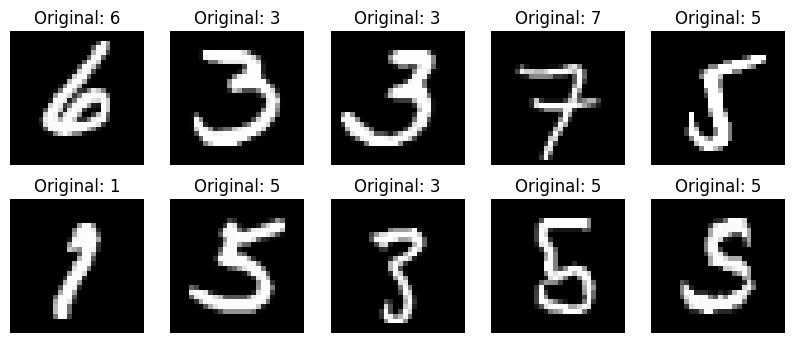

In [11]:
vis_dt(train_images, train_labels)

In [12]:
#Pre-Processing Data for unbiased learning

transform_augment= transforms.Compose([
    transforms.RandomRotation(degrees= 10),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [13]:
mnist_augment_dataset_train = dt.MNIST(root='./data', download = True, train = True, transform = transform_augment)

In [14]:
mnist_augment_loader = DataLoader(mnist_augment_dataset_train, batch_size= 64, shuffle = True)

In [15]:
# visualization of the augmented images data set
# The labels on augmented images are different from original due to shuffle in data loader; removal of which generates same dataset

def vis_dt(augmented_images, labels, title = 'Augmented Images'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axes[i//5, i% 5]
        ax.imshow(augmented_images[i].squeeze().numpy(), cmap='gray', aspect='equal')
        ax.set_title(f'Augmented: {labels[i].item()}', fontsize=12)
        ax.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

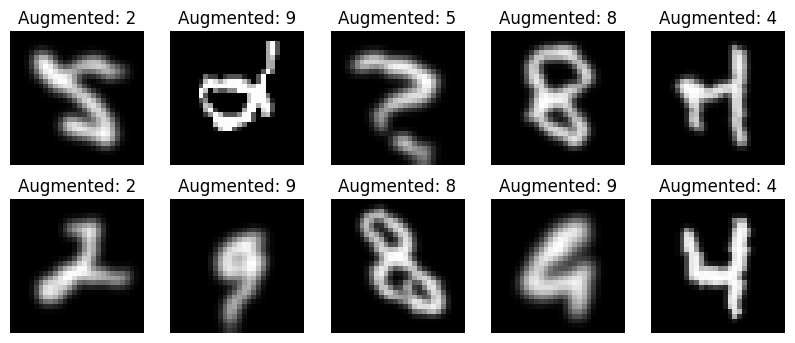

In [16]:
augmented_images, labels = next(iter(mnist_augment_loader))
vis_dt(augmented_images, labels, title= 'Augmented Images')

In [17]:
# Training of Base Line Multi Layer Perceptron Model (Week 2)

In [18]:
# Importing necessary modules
import torch.nn as nn
import torch.optim as optim

In [19]:
# Defining the MLP Model and the fully connected layers
class MLP(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=512, output_size=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) #Fully connected linear layer connecting input layer and hidden layer
        self.relu = nn.ReLU() #Activation function ReLU as no squashing of input range
        self.fc2 = nn.Linear(hidden_size, output_size) #Fully connected linear layer connecting hidden layer and output layer
        
    #Forward pass to define flow of data through layers
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flattening the 2D image to a 1D vector
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [20]:
# Model, Loss Function and optimizer initializer
model = MLP()
criterion = nn.CrossEntropyLoss() #Cross Entropy due to Multi Class Function
optimizer = optim.Adam(model.parameters(), lr=0.0009)  # Adam optimizer due to minimal tuning of hyoerparameters

In [21]:
num_epochs = 30 
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Clearing of gradients before backward pass
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Loss Calculations
        loss.backward()  # Backward pass
        optimizer.step()  # Updating weights based on gradients
        total_loss += loss.item()  # Accumulation of the loss

    avg_loss = total_loss / len(train_loader)  # Calculation of the average loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.2f}')


Epoch [1/30], Loss: 0.31
Epoch [2/30], Loss: 0.14
Epoch [3/30], Loss: 0.11
Epoch [4/30], Loss: 0.09
Epoch [5/30], Loss: 0.07
Epoch [6/30], Loss: 0.06
Epoch [7/30], Loss: 0.05
Epoch [8/30], Loss: 0.05
Epoch [9/30], Loss: 0.04
Epoch [10/30], Loss: 0.04
Epoch [11/30], Loss: 0.04
Epoch [12/30], Loss: 0.03
Epoch [13/30], Loss: 0.03
Epoch [14/30], Loss: 0.03
Epoch [15/30], Loss: 0.03
Epoch [16/30], Loss: 0.02
Epoch [17/30], Loss: 0.02
Epoch [18/30], Loss: 0.02
Epoch [19/30], Loss: 0.02
Epoch [20/30], Loss: 0.02
Epoch [21/30], Loss: 0.02
Epoch [22/30], Loss: 0.02
Epoch [23/30], Loss: 0.02
Epoch [24/30], Loss: 0.02
Epoch [25/30], Loss: 0.02
Epoch [26/30], Loss: 0.02
Epoch [27/30], Loss: 0.01
Epoch [28/30], Loss: 0.02
Epoch [29/30], Loss: 0.01
Epoch [30/30], Loss: 0.02
